In [1]:
# Install Required Libraries
!pip install pandas matplotlib seaborn sentence-transformers faiss-cpu beautifulsoup4 tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
# Cell 2: Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from sentence_transformers import SentenceTransformer
import faiss
from tqdm import tqdm
import re

print("Libraries imported successfully!")

Libraries imported successfully!


In [56]:
# Cell 3: Load and Explore Data
df = pd.read_csv("jobs.csv", dtype={'lid': str})

# Basic exploration
print(f"Dataset shape: {df.shape}")
print("\nFirst 3 rows:")
display(df.head(3))

Dataset shape: (100000, 17)

First 3 rows:


jobTitle        companyName  \
0  Nuclear Medicine Tech, Full Time, Day Shift   Adventist Health   
1          Radiation Therapist - SIGN-ON BONUS  SkinCure Oncology   
2            Delivery Driver - Earn Extra Cash           DoorDash   

                                lid  \
0  07213bcc5db0efec311b1884459defed   
1  53994c1a47063a39ed3bf5509c0d6676   
2  22ea5183b183b0ba1999b465cddc0364   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [57]:
# Missing values analysis
print("\nMissing values summary:")
print(df.isna().sum())


Missing values summary:
jobTitle                0
companyName           325
lid                     0
jobDescRaw              0
finalZipcode         2051
finalState           1420
finalCity            1795
companyBranchName     325
jobDescUrl              0
nlpBenefits             0
nlpSkills               0
nlpSoftSkills           0
nlpDegreeLevel          0
nlpEmployment           0
nlpSeniority            0
correctDate            14
scrapedLocation         0
dtype: int64


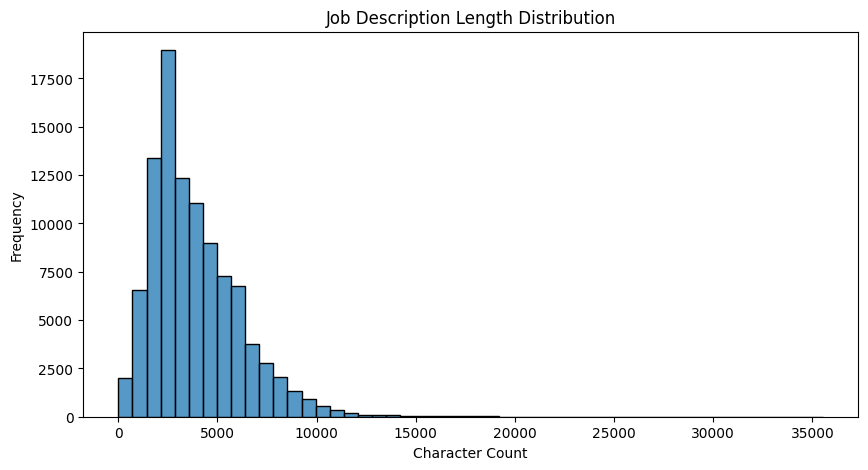

In [58]:
# Text length distribution
df['text_length'] = df['jobDescRaw'].str.len()
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=50)
plt.title('Job Description Length Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

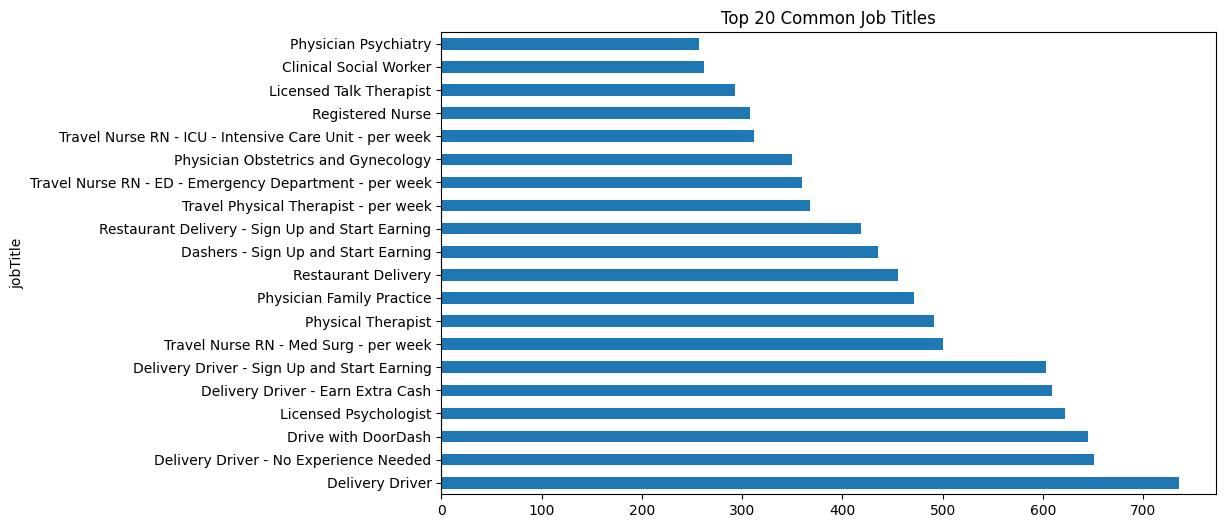

In [59]:
# Job titles distribution
plt.figure(figsize=(10, 6))
df['jobTitle'].value_counts().head(20).plot(kind='barh')
plt.title('Top 20 Common Job Titles')
plt.show()

In [60]:
# Text Preprocessing
def clean_job_description(html_text):
    """Clean HTML and normalize text"""
    try:
        # Remove HTML tags
        soup = BeautifulSoup(html_text, "html.parser")
        text = soup.get_text(separator=" ", strip=True)

        # Remove special characters and normalize
        text = re.sub(r'\s+', ' ', re.sub(r'[^a-zA-Z0-9\s]', ' ', text))
        return text.lower().strip()[:2000]  # Truncate to 2000 characters
    except:
        return ""

# Apply cleaning
df['clean_text'] = df['jobDescRaw'].apply(clean_job_description)

# Show before/after example
print("Original Text Example:")
print(df['jobDescRaw'].iloc[0][:500] + "...")
print("\nCleaned Text Example:")
print(df['clean_text'].iloc[0][:500] + "...")

Original Text Example:
<div class="normalText"><p>Job Description</p>
<p style="height:6px;"></p>
<p>LOCATION SUMMARY:</p>
<p>Located in Templeton amongst the oak trees, Adventist Health Twin Cities has been serving northern San Luis Obispo County since 1977. Comprised of a 122-bed acute care facility, our team provides exceptional care in emergency medicine, orthopedics, obstetrics, digestive disorders, wound care, and various medical, surgical and outpatient services. Locals enjoy weekly farmers markets in downto...

Cleaned Text Example:
job description location summary located in templeton amongst the oak trees adventist health twin cities has been serving northern san luis obispo county since 1977 comprised of a 122 bed acute care facility our team provides exceptional care in emergency medicine orthopedics obstetrics digestive disorders wound care and various medical surgical and outpatient services locals enjoy weekly farmers markets in downtown templeton farm to fork dining bea

In [61]:
# Generate Embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
batch_size = 256  # Reduce if memory constrained

# Generate embeddings in batches
embeddings = []
for i in tqdm(range(0, len(df), batch_size), desc="Generating Embeddings"):
    batch = df['clean_text'].iloc[i:i+batch_size].tolist()
    batch_emb = model.encode(batch, convert_to_numpy=True)
    embeddings.append(batch_emb)

embeddings = np.vstack(embeddings)
print(f"Embeddings shape: {embeddings.shape}")

Generating Embeddings: 100%|██████████| 391/391 [04:54<00:00,  1.33it/s]

Embeddings shape: (100000, 384)


In [62]:
# Setup FAISS Index
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)

# Create ID mapping
id_to_job = {i: lid for i, lid in enumerate(df['lid'])}
job_to_idx = {lid: i for i, lid in id_to_job.items()}

# Add to index
index.add(embeddings)
print(f"Index contains {index.ntotal} vectors")

Index contains 100000 vectors


In [63]:
# Duplicate Detection Function'
# taking 0.5 as a normal threshold
def find_duplicates(index, embeddings, id_map, threshold=0.5):
    """Find potential duplicates using FAISS"""
    # Normalize embeddings for cosine similarity
    faiss.normalize_L2(embeddings)
    index = faiss.IndexFlatIP(dimension)
    index.add(embeddings)

    # Search for top 5 neighbors
    D, I = index.search(embeddings, 5)

    duplicates = []
    for idx in range(len(D)):
        for neighbor_idx, score in zip(I[idx], D[idx]):
            if idx != neighbor_idx and score >= threshold:
                duplicates.append({
                    'job_id_1': id_map[idx],
                    'job_id_2': id_map[neighbor_idx],
                    'similarity_score': score
                })

    return pd.DataFrame(duplicates).drop_duplicates()

# Find duplicates with 0.85 threshold
duplicates_df = find_duplicates(index, embeddings, id_to_job)
print(f"Found {len(duplicates_df)} potential duplicates")

Found 406170 potential duplicates


In [64]:
duplicates_df.head()

,job_id_1,job_id_2,similarity_score
0,07213bcc5db0efec311b1884459defed,fe09a15a28fbe89d43df54d50b957669,0.762227
1,07213bcc5db0efec311b1884459defed,8bd109733354d4fe5fe299ac18057306,0.749233
2,07213bcc5db0efec311b1884459defed,300366bacd5fb2642a9a374160bc7aa8,0.725804
3,07213bcc5db0efec311b1884459defed,ce26b9916bd86151841cc518566ef583,0.714470
4,53994c1a47063a39ed3bf5509c0d6676,a3edd53f80c4ee7f2aace6a26628f736,0.977190


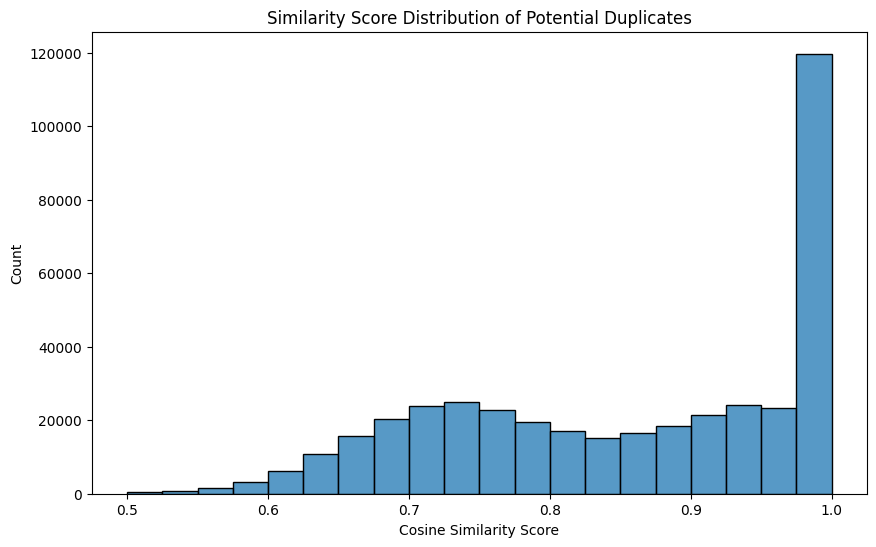

In [65]:
# Evaluate Results by Similarity distribution
plt.figure(figsize=(10, 6))
sns.histplot(duplicates_df['similarity_score'], bins=20)
plt.title('Similarity Score Distribution of Potential Duplicates')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Count')
plt.show()

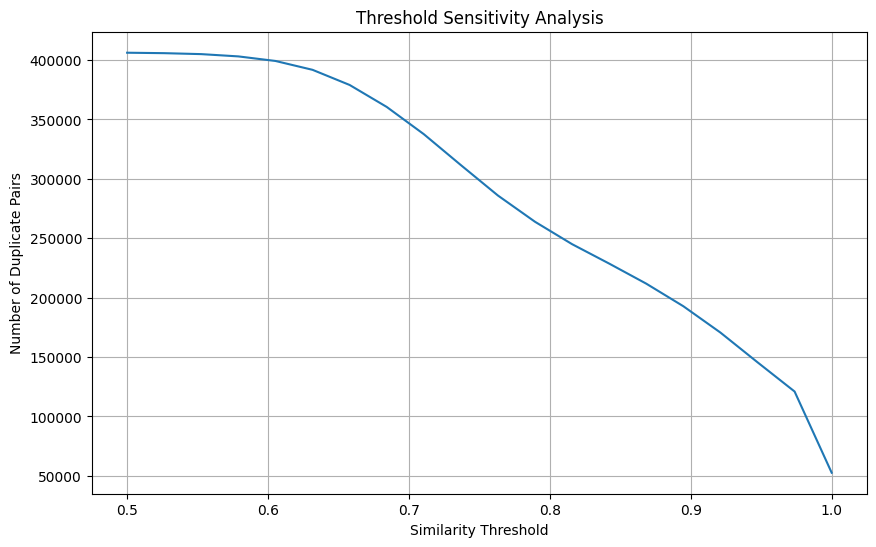

In [66]:
# Threshold analysis
thresholds = np.linspace(0.5, 1.0, 20)
counts = [len(duplicates_df[duplicates_df['similarity_score'] >= t]) for t in thresholds]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, counts)
plt.title('Threshold Sensitivity Analysis')
plt.xlabel('Similarity Threshold')
plt.ylabel('Number of Duplicate Pairs')
plt.grid(True)
plt.show()

In [67]:
# Display top matches
pd.set_option('display.max_colwidth', None)
sample_duplicates = duplicates_df.sort_values('similarity_score', ascending=False).head(10)

print("Top 10 Potential Duplicates:")
display(sample_duplicates)

# Show full job details for a sample pair
sample_pair = sample_duplicates.iloc[0]
job1 = df[df['lid'] == sample_pair['job_id_1']].iloc[0]
job2 = df[df['lid'] == sample_pair['job_id_2']].iloc[0]

print("\nSample Duplicate Pair Details:")
print(f"\nJob 1 ({sample_pair['similarity_score']:.2f} similarity):")
print(f"Title: {job1['jobTitle']}")
print(f"Company: {job1['companyName']}")
print(f"Description: {job1['clean_text'][:500]}...")

print(f"\nJob 2:")
print(f"Title: {job2['jobTitle']}")
print(f"Company: {job2['companyName']}")
print(f"Description: {job2['clean_text'][:500]}...")

Top 10 Potential Duplicates:


,job_id_1,job_id_2,similarity_score
356533,fcb7028b08a79b0b8014f7150c7c57c9,4f3088cb21206b4aed90ec03286839f0,1.000001
356532,fcb7028b08a79b0b8014f7150c7c57c9,b1c134b78b306532174cf0b24b3d17eb,1.000001
356531,fcb7028b08a79b0b8014f7150c7c57c9,7cfbe29cfdf4f97d7186a8abc98b8cee,1.000001
356530,fcb7028b08a79b0b8014f7150c7c57c9,aba7e5af242bade923fe8ce66a81652b,1.000001
235931,81df0677b294322d2376df7270f17bcf,b0c6ab129a941a09d7c848f2bbe261a9,1.000001
373415,00017d69686b7c8049a791fd7cc33524,3b8c85191092747c06f17905bb28b36c,1.000001
131416,ab9e39b301ef3a4e648359eb8c620e31,4f3088cb21206b4aed90ec03286839f0,1.000001
235930,81df0677b294322d2376df7270f17bcf,8285ef70b0205f0c79cea00f989d2868,1.000001
235929,81df0677b294322d2376df7270f17bcf,1dd94f5efa83a8a0f7a0a424a1b15da1,1.000001
2446,a48d375a6b419a303ca39b834f5562b9,8dc72a0da1a78661505c18455678bf5f,1.000001



Sample Duplicate Pair Details:

Job 1 (1.00 similarity):
Title: Client Success Coordinator Remote
Company: HMG Careers
Description: this full time position offers flexible work hours and ample opportunities for advancement into management roles you will work remotely to serve clients and offer valuable advice and protection to individuals and their families what we offer remote work from home career average first year earnings of 69k commission bonuses life long residual income through renewals unionized position with stock options excellent benefits package medical dental and prescription coverage exceptional training with ...

Job 2:
Title: Junior Manager Remote
Company: HMG Careers
Description: this full time position offers flexible work hours and ample opportunities for advancement into management roles you will work remotely to serve clients and offer valuable advice and protection to individuals and their families what we offer remote work from home career average first year ea

In [69]:
# Find jobs near 0.95 similarity
high_sim = duplicates_df[
    (duplicates_df['similarity_score'] >= 0.94) &
    (duplicates_df['similarity_score'] <= 0.96)
].head(1)

# Find jobs near 0.7 similarity
low_sim = duplicates_df[
    (duplicates_df['similarity_score'] >= 0.69) &
    (duplicates_df['similarity_score'] <= 0.71)
].head(1)

def display_pair(pair_df, original_df):
    """Display detailed comparison of a job pair"""
    if pair_df.empty:
        print("No matching pairs found in this range")
        return

    pair = pair_df.iloc[0]
    job1 = df[df['lid'] == pair['job_id_1']].iloc[0]
    job2 = df[df['lid'] == pair['job_id_2']].iloc[0]

    print(f"\n{'='*40}")
    print(f"Similarity Score: {pair['similarity_score']:.4f}")
    print(f"{'='*40}")

    print("\nJob 1:")
    print(f"Title: {job1['jobTitle']}")
    print(f"Company: {job1['companyName']}")
    print(f"Location: {job1['finalCity']}, {job1['finalState']}")
    print("\nDescription Excerpt:")
    print(job1['clean_text'][:500] + "...")

    print("\n\nJob 2:")
    print(f"Title: {job2['jobTitle']}")
    print(f"Company: {job2['companyName']}")
    print(f"Location: {job2['finalCity']}, {job2['finalState']}")
    print("\nDescription Excerpt:")
    print(job2['clean_text'][:500] + "...")

print("High Similarity Pair (0.95 range):")
display_pair(high_sim, df)

print("\n\nLow Similarity Pair (0.7 range):")
display_pair(low_sim, df)

High Similarity Pair (0.95 range):

Similarity Score: 0.9556

Job 1:
Title: Merchandiser K050
Company: Jobs for Humanity
Location: Burton upon Trent, nan

Description Excerpt:
company description jobs for humanity is collaborating with cpm to build an inclusive and just employment ecosystem we support individuals coming from all walks of life company name cpm job description are you looking for a part time role to boost your income cpm is looking for team members who can join us to place pos point of sale and in store media in asda if you can work every thursday average 5 hours per week and have experience merchandising placing pos we want to hear from you 13 56 per h...


Job 2:
Title: Merchandiser G016
Company: Jobs for Humanity
Location: Burton upon Trent, nan

Description Excerpt:
company description jobs for humanity is collaborating with cpm to build an inclusive and just employment ecosystem we support individuals coming from all walks of life company name cpm job description ar